In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/github_repo/colab-study-materials/doit_data_analysis

Mounted at /content/drive
/content/drive/MyDrive/github_repo/colab-study-materials/doit_data_analysis


## ch5. 데이터 분석 기초

In [30]:
import pandas as pd
import numpy as np

df = pd.read_csv('./files/midwest.csv')
print(f'shape: {df.shape}')
df.head()

shape: (437, 28)


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [ ]:
df_new = df.copy()
df_new = df_new.rename(columns={
    'poptotal': 'total',
    'popasian': 'asian'
})
df_new[['total','asian']].head()

,total,asian
0,66090,249
1,10626,48
2,14991,16
3,30806,150
4,5836,5


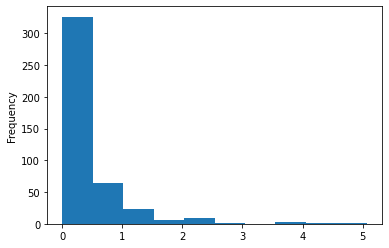

In [ ]:
df_new['asianrate'] = 100 * df_new['asian'] / df_new['total']
df_new['asianrate'].plot.hist()

In [ ]:
df_new['asianmuch'] = np.where(df_new['asianrate'] > df_new['asianrate'].mean(),
                               'large', 'small')
df_new['asianmuch'].value_counts()

small    318
large    119
Name: asianmuch, dtype: int64

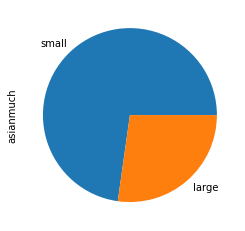

In [ ]:
df_new['asianmuch'].value_counts().plot.pie()

## ch6. 자유자재로 데이터 분석하기

In [40]:
df_ch6 = df.copy()
df_ch6['kidsrate'] = 100 * (1 - (df_ch6['popadults'] / df_ch6['poptotal']))
df_ch6[['county', 'poptotal', 'popadults', 'kidsrate']]\
    .sort_values('kidsrate', ascending=False)\
    .head()

,county,poptotal,popadults,kidsrate
230,ISABELLA,54624,26492,51.501172
404,MENOMINEE,3890,1922,50.591260
281,ATHENS,59549,30179,49.320727
247,MECOSTA,37308,19005,49.059183
154,MONROE,108978,57368,47.358182


middle    396
large      32
small       9
Name: kidshowmuch, dtype: int64


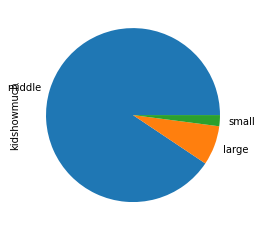

In [37]:
df_ch6['kidshowmuch'] = np.where(df_ch6['kidsrate'] >= 40, 'large',
                        np.where(df_ch6['kidsrate'] >= 30, 'middle', 'small'))
print(df_ch6['kidshowmuch'].value_counts())
df_ch6['kidshowmuch'].value_counts().plot.pie()

In [44]:
df_ch6[['state', 'county', 'popasian', 'poptotal']]\
    .assign(asianrate=lambda x: 100 * x['popasian'] / x['poptotal'])\
    .sort_values('asianrate')\
    [['state', 'county', 'asianrate']]\
    .head(10)

,state,county,asianrate
404,WI,MENOMINEE,0.000000
105,IN,BENTON,0.010592
109,IN,CARROLL,0.015950
358,OH,VINTON,0.027032
390,WI,IRON,0.032504
85,IL,SCOTT,0.053154
112,IN,CLAY,0.060716
261,MI,OSCODA,0.063759
340,OH,PERRY,0.066546
73,IL,PIATT,0.070749
